## Predicting Apartment Prices in Mexico City 

Goal: A consolidation of the contents in 0-price-and size, 1-price-and-location, 2-price-and-neighborhood, and price-and-everything using the mexico dataset.

In [1]:
# Import libraries here
from glob import glob

import pandas as pd
import numpy as np
import seaborn as sns
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact


from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

### Prepare Data

#### Import

In [3]:
# Build your `wrangle` function
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Subset data: Apartments in "Distrito Federal", less than 100, 0000
    mask_ba = df["place_with_parent_names"].str.contains("Distrito Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 100_000
    df = df[mask_ba & mask_apt & mask_price]
    
    # subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]
    
    # split lat and lon columns
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns="lat-lon", inplace=True)
    
    # Create a feature "borough"
    df["borough"] = df["place_with_parent_names"].str.split("|", expand=True)[1]
    df.drop(columns="place_with_parent_names", inplace=True)
    
    # Drop columns with more than 50% null values
    df.drop(columns =["surface_total_in_m2",
                      "price_usd_per_m2",
                      "rooms",
                      "floor",
                      "expenses"], inplace=True)
    # Drropp columns with low and high cardinality categiorical variables
    df.drop(columns=["operation", "property_type", "currency", "properati_url"], inplace=True)
    
    # drop leaky columns
    df.drop(columns=["price", "price_aprox_local_currency", "price_per_m2"], inplace=True)
    
    # drop columns with multicollinearity
    None
    return df

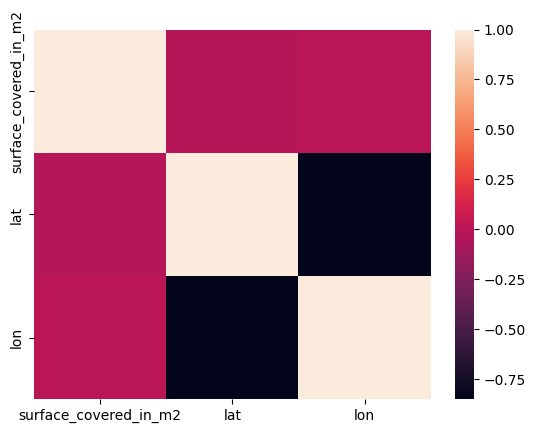

In [4]:
# Testing wrangle function and explore the data
files = glob("data/mexico-city-real-estate*.csv")
frames = [wrangle(file) for file in files]
df = pd.concat(frames)
corr = round(df.select_dtypes("number").drop(columns="price_aprox_usd").corr(), 4)
sns.heatmap(corr);

Collect files using glob function

In [ ]:
file = glob("data/mexico-city-real-*.csv")
files